# Student ID: x22173391

#MSc Research Project in Data Analytics




# Importing library tools and packages

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [3]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:


data_folder = '/content/drive/MyDrive/Colab Notebooks/thesisData'
file_path = data_folder + '/FineTech_appData.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)


## Data Exploration

In [4]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


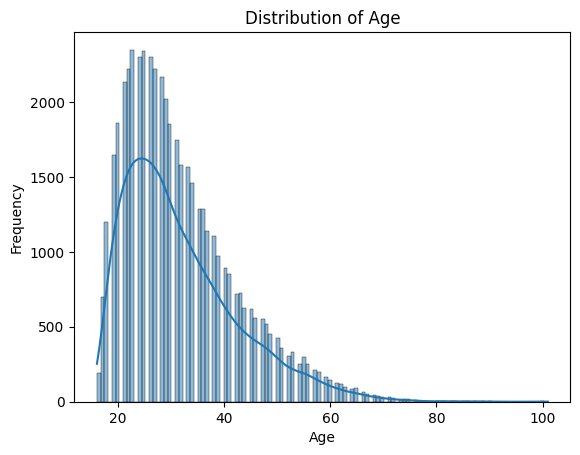

In [5]:
# Histogram for 'age'
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

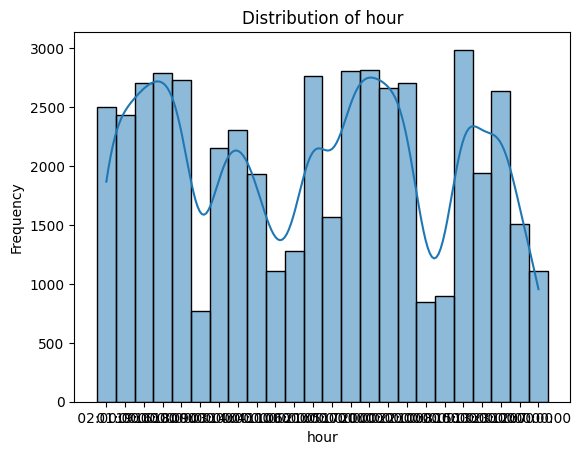

In [6]:
sns.histplot(data['hour'], kde=True)
plt.title('Distribution of hour')
plt.xlabel('hour')
plt.ylabel('Frequency')

plt.show()

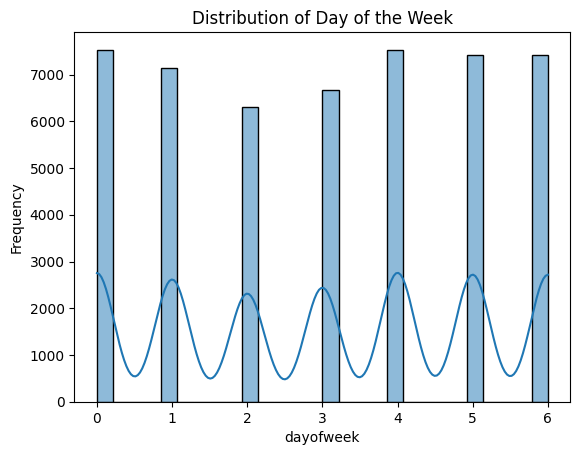

In [7]:
sns.histplot(data['dayofweek'], kde=True)
plt.title('Distribution of Day of the Week')
plt.xlabel('dayofweek')
plt.ylabel('Frequency')
plt.show()

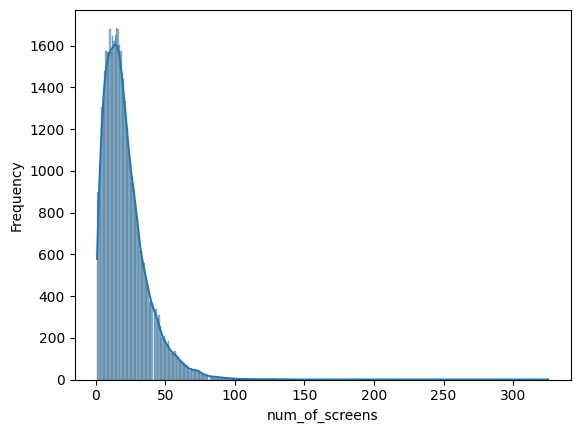

In [8]:
sns.histplot(data['numscreens'], kde=True)
plt.xlabel('num_of_screens')
plt.ylabel('Frequency')
plt.show()

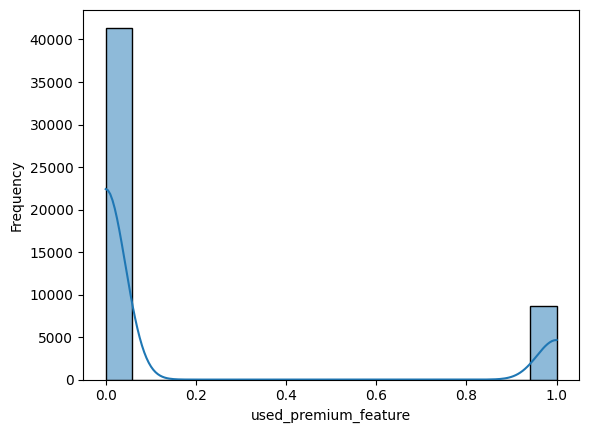

In [9]:
sns.histplot(data['used_premium_feature'], kde=True)
plt.xlabel('used_premium_feature')
plt.ylabel('Frequency')
plt.show()

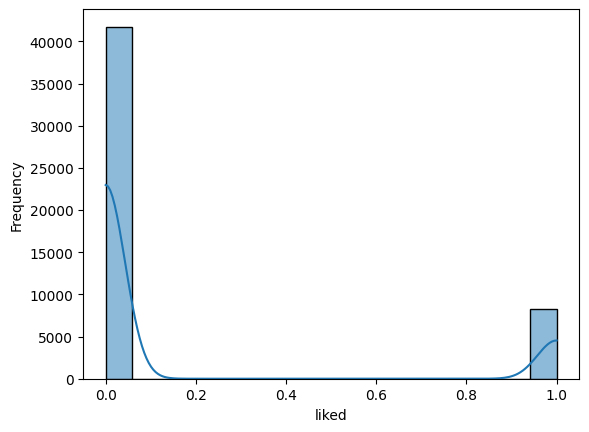

In [10]:
sns.histplot(data['liked'], kde=True)
plt.xlabel('liked')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-db7d7e6342c2>:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset2.corrwith(data.enrolled).plot.bar(figsize=(12,10),


<Axes: title={'center': 'Correlation with Reposnse variable'}>

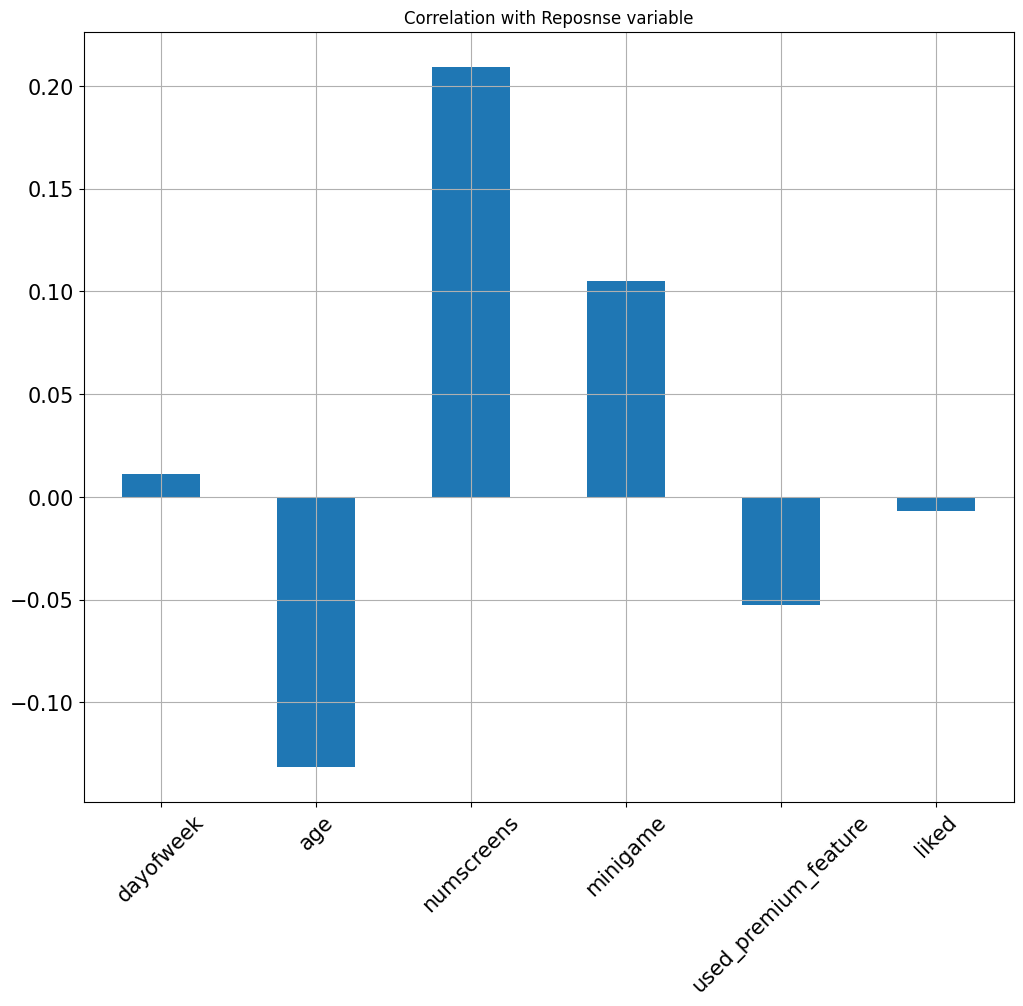

In [11]:
### Plotting corelation
dataset2 = data.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])

## Correlation with Response Variable
dataset2.corrwith(data.enrolled).plot.bar(figsize=(12,10),
                  title = 'Correlation with Reposnse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

<ipython-input-12-073edaadad7d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset2.corr()
<ipython-input-12-073edaadad7d>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

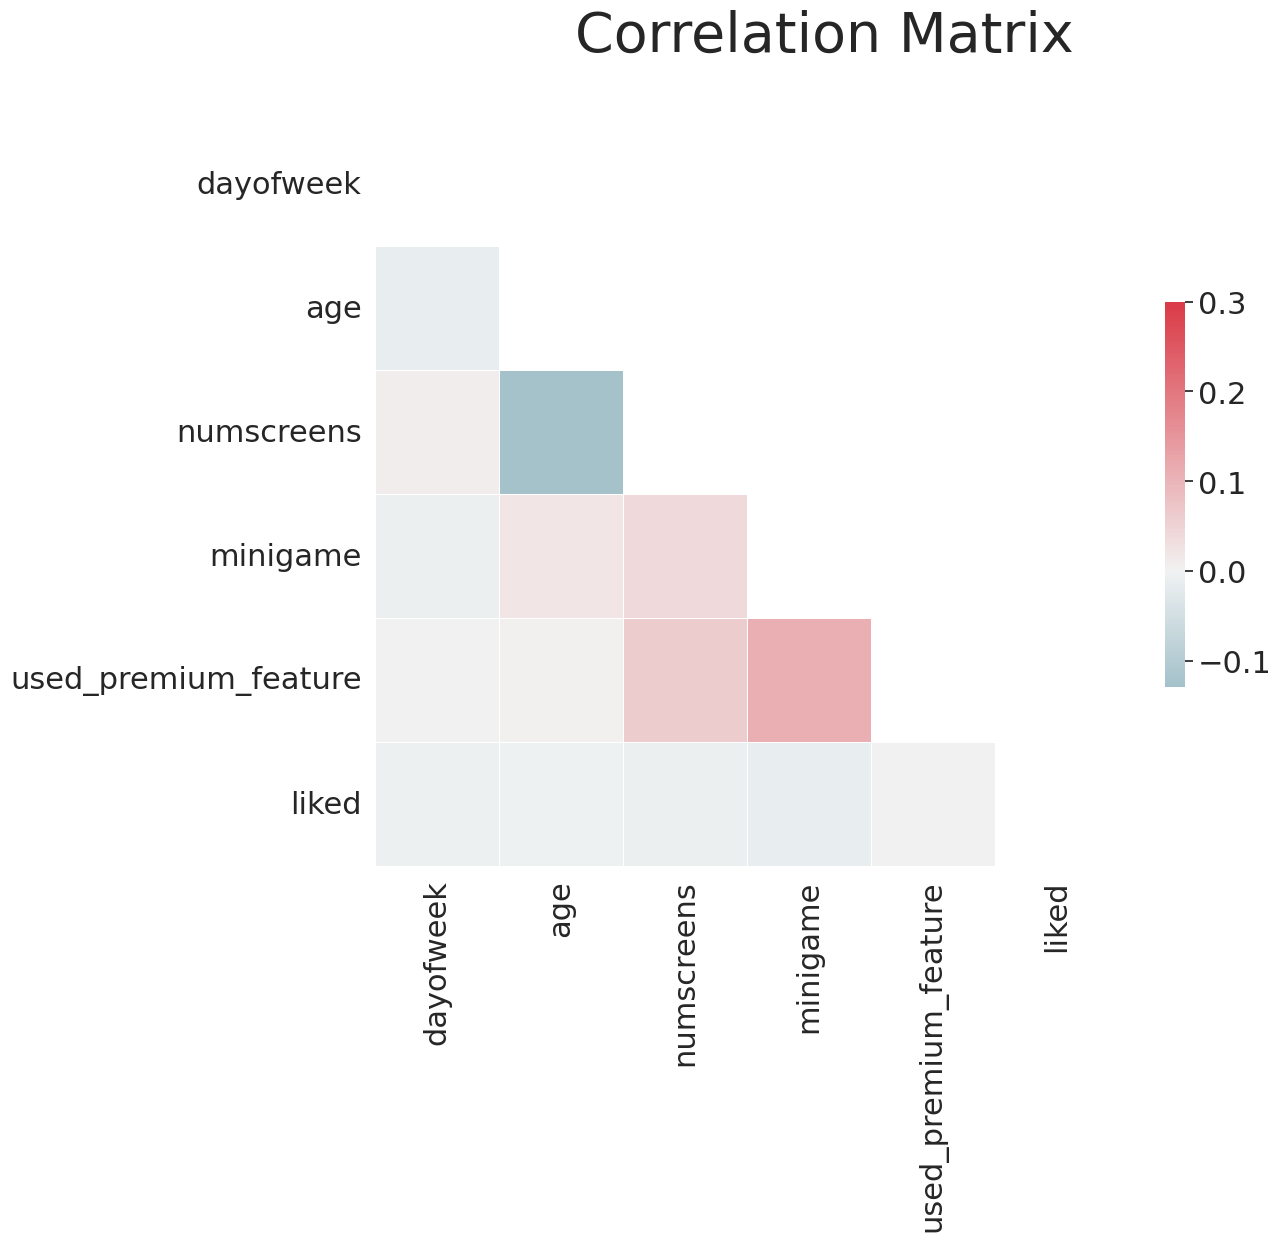

In [12]:


## Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [13]:
# Assuming screens in 'screen_list' are comma-separated
distinct_screens = set()

# Loop through each row and extract distinct screens
for screens in data['screen_list']:
    for screen in screens.split(','):
        distinct_screens.add(screen.strip())  # Remove any leading or trailing whitespaces

# Display the distinct screens
print(distinct_screens)


{'VerifyCountry', 'VerifyPhone', 'WelcomeBankVerification', 'CameraScreen', 'BVPlaidLinkContainer', 'LoanAppRequestAmount', 'ReferralContainer', 'VerifyHousing', 'Loan4', 'Saving10', 'product_review5', 'NetworkFailure', 'CC1', 'Cycle', 'Rewards', 'Saving1', 'Credits', 'Saving5', 'ProfilePage', 'Credit1', 'BankVerification', 'CommunityAndInvites', 'product_review2', 'ProfileCompanyName', 'SecurityModal', 'LoanAppSuccess', 'ResendToken', 'NetworkUser', 'Credit3Dashboard', 'Saving7', 'GroupedInstitutions', 'LoanAppDenied', 'CC1Category', 'SavingGoalOther', 'SignupName', 'LoanAppWithdrawn', 'VerifyHousingAmount', 'Saving2', 'VerifyToken', 'LoanAppAgreement', 'Leaderboard', 'product_review3', 'Loan1', 'Signup', 'ProfileMaritalStatus', 'Credit3Alerts', 'VerifyIncomeType', 'InstantLoanSSN', 'InstantOfferCreateAccount', 'FindFriendsCycle', 'VerifyDateOfBirth', 'VerifyBankInfo', 'SavingGoalEdit', 'Referrals', 'location', 'LoanAppPaymentSchedule', 'YourNetwork', 'Rewardjoinscreen', 'ProfileEduca

In [14]:
print(f"Number of distinct screens: {len(distinct_screens)}")

Number of distinct screens: 137


In [15]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [17]:
data["hour"] = data.hour.str.slice(1, 3).astype(int)

In [18]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

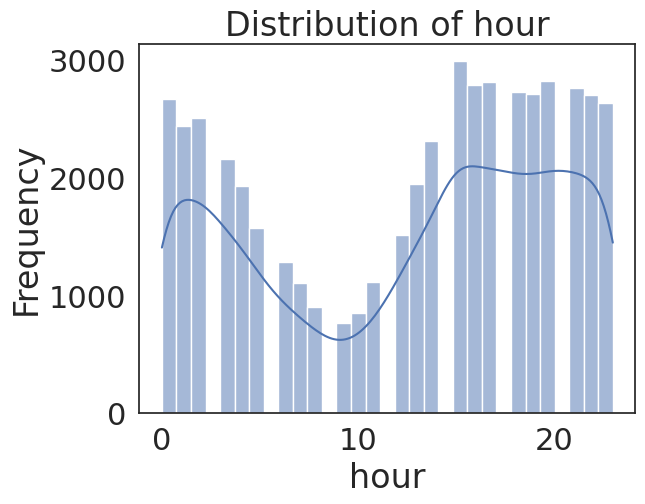

In [19]:
sns.histplot(data['hour'], kde=True)
plt.title('Distribution of hour')
plt.xlabel('hour')
plt.ylabel('Frequency')

plt.show()

## feature engineering

In [20]:

# Assuming 'data' is a DataFrame with a column named 'first_open'
data["first_open"] = [datetime.strptime(row_date, "%Y-%m-%d %H:%M:%S.%f") for row_date in data["first_open"]]


In [21]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date                   object
liked                            int64
dtype: object

In [22]:
# Assuming 'data' is a DataFrame with a column named 'enrolled_date'
data["enrolled_date"] = [datetime.strptime(row_date, "%Y-%m-%d %H:%M:%S.%f") if isinstance(row_date, str) else row_date for row_date in data["enrolled_date"]]


In [23]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

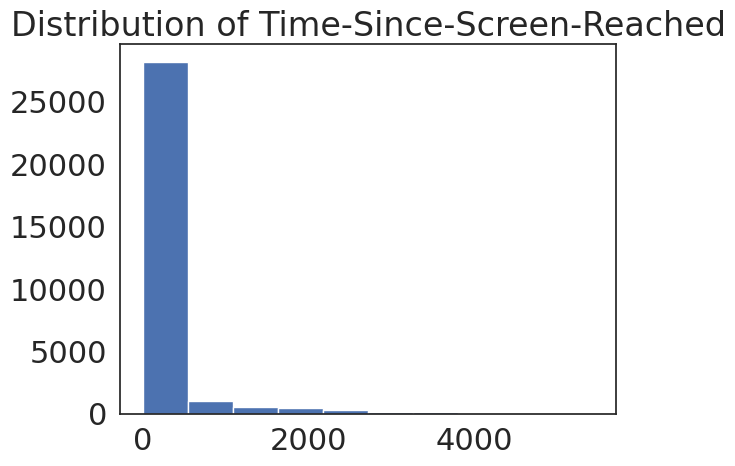

In [24]:
data["difference"] = (data.enrolled_date-data.first_open).astype('timedelta64[h]')
response_hist = plt.hist(data["difference"].dropna())
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

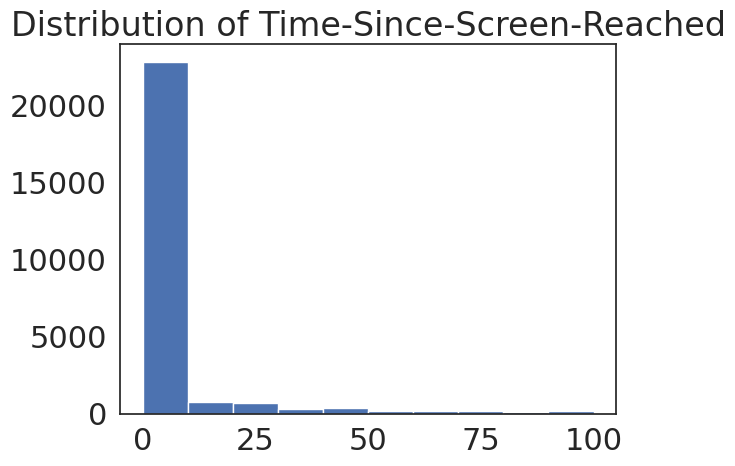

In [25]:
plt.hist(data["difference"].dropna(), range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [26]:
data.loc[data.difference > 50, 'enrolled'] = 0
data = data.drop(columns=['enrolled_date', 'difference', 'first_open'])

# Formatting the screen_list Field

In [27]:
# Load Top Screens

topScreen_file_path = data_folder + '/top_screens.csv'

# Read the CSV file into a Pandas DataFrame
top_screens = pd.read_csv(topScreen_file_path).top_screens.values

top_screens


array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [28]:
# Mapping Screens to Fields
data["screen_list"] = data.screen_list.astype(str) + ','

for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc+",", "")


In [29]:
data.head

<bound method NDFrame.head of          user  dayofweek  hour  age  \
0      235136          3     2   23   
1      333588          6     1   24   
2      254414          1    19   23   
3      234192          4    16   28   
4       51549          1    18   31   
...       ...        ...   ...  ...   
49995  222774          3    13   32   
49996  169179          1     0   35   
49997  302367          2    22   39   
49998  324905          6    12   27   
49999   27047          4     1   25   

                                             screen_list  numscreens  \
0      joinscreen,product_review,ScanPreview,VerifyTo...          15   
1      joinscreen,product_review,product_review2,Scan...          13   
2                                                                  3   
3      product_review,Home,product_review,ReferralCon...          40   
4      joinscreen,ScanPreview,VerifySSN,Home,SelectIn...          32   
...                                                  ...         ... 

In [30]:
data['Other_screenlist'] = data.screen_list.str.count(",")
data = data.drop(columns=['screen_list'])

In [31]:
data.head

<bound method NDFrame.head of          user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  Loan2  ...  Login  \
0                         0         0      0      1  ...      1   
1                         0         0      0      1  ...      0   
2                         1         

# creating funnel for the screen belong to the same funnel by observing throught the top screen list to get to know the knowledge

In [32]:
savings_screens_funnel = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
data["SavingCount_col"] = data[savings_screens_funnel].sum(axis=1)
data = data.drop(columns=savings_screens_funnel)

### similarly for other funnel

In [33]:
#credit monetering funnel

cm_screens_funnel = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data["CMCount_col"] = data[cm_screens_funnel].sum(axis=1)
data = data.drop(columns=cm_screens_funnel)

In [34]:
#credit card funnel

cc_screens_funnel = ["CC1",
                "CC1Category",
                "CC3"]
data["CCCount_col"] = data[cc_screens_funnel].sum(axis=1)
data = data.drop(columns=cc_screens_funnel)

In [35]:
# loan screen funnel

loan_screens_funnel = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data["LoansCount_col"] = data[loan_screens_funnel].sum(axis=1)
data = data.drop(columns=loan_screens_funnel)

In [36]:
data.head

<bound method NDFrame.head of          user  dayofweek  hour  age  numscreens  minigame  \
0      235136          3     2   23          15         0   
1      333588          6     1   24          13         0   
2      254414          1    19   23           3         0   
3      234192          4    16   28          40         0   
4       51549          1    18   31          32         0   
...       ...        ...   ...  ...         ...       ...   
49995  222774          3    13   32          13         0   
49996  169179          1     0   35           4         0   
49997  302367          2    22   39          25         0   
49998  324905          6    12   27          26         0   
49999   27047          4     1   25          26         0   

       used_premium_feature  enrolled  liked  location  ...  SecurityModal  \
0                         0         0      0         0  ...              0   
1                         0         0      0         1  ...              0   
2  

In [37]:
data.to_csv('feature_engineered_data.csv', index = False)

file_name = 'feature_engineered_data.csv'

# Save the DataFrame to the drive
file_path = os.path.join(data_folder, file_name)
data.to_csv(file_path, index=False)

In [38]:
file_path = data_folder + '/feature_engineered_data.csv'

# Read the CSV file into a Pandas DataFrame
modellingData = pd.read_csv(file_path)

# Data Preprocessing

In [39]:
# Splitting Independent and Response Variables
response = modellingData["enrolled"]
modellingData = modellingData.drop(columns="enrolled")

In [40]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(modellingData, response,
                                                    test_size = 0.2)


In [41]:
modellingData.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other_screenlist,SavingCount_col,CMCount_col,CCCount_col,LoansCount_col
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,10,0,2,0,1


In [42]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [43]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other_screenlist,SavingCount_col,CMCount_col,CCCount_col,LoansCount_col
11548,2,4,28,74,0,0,0,1,1,1,...,0,0,0,0,0,11,6,4,0,1
21946,4,13,20,23,0,0,0,1,0,1,...,0,0,0,0,0,8,0,0,0,0
31852,4,19,34,24,0,0,0,0,1,1,...,0,0,0,0,0,5,4,4,0,1
47638,2,7,19,12,0,0,0,1,0,1,...,0,0,0,0,0,6,0,0,0,0
30960,4,12,27,12,0,0,0,1,0,0,...,0,0,0,0,0,7,0,0,0,1


In [44]:
X_train.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other_screenlist',
       'SavingCount_col', 'CMCount_col', 'CCCount_col', 'LoansCount_col'],
      dtype='object')

# Feature Scaling

In [45]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

#Building Neural network

In [46]:
# Create a Sequential model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers (you can customize the architecture)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer with a sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Analysing epoch calculation to avoid underfiting or overfiting issues in the the model by ploting validation and training loss and accuracy graph

In [47]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
500/500 [==============================] - 5s 7ms/step - loss: 0.5077 - accuracy: 0.7584 - val_loss: 0.4857 - val_accuracy: 0.7694
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 0.4702 - accuracy: 0.7795 - val_loss: 0.4762 - val_accuracy: 0.7715
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 0.4611 - accuracy: 0.7844 - val_loss: 0.4745 - val_accuracy: 0.7724
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4539 - accuracy: 0.7878 - val_loss: 0.4754 - val_accuracy: 0.7721
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4492 - accuracy: 0.7905 - val_loss: 0.4724 - val_accuracy: 0.7715
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4452 - accuracy: 0.7943 - val_loss: 0.4736 - val_accuracy: 0.7707
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4415 - accuracy: 0.7947 - val_loss: 0.4770 - val_accuracy: 0.7739
Epoch 

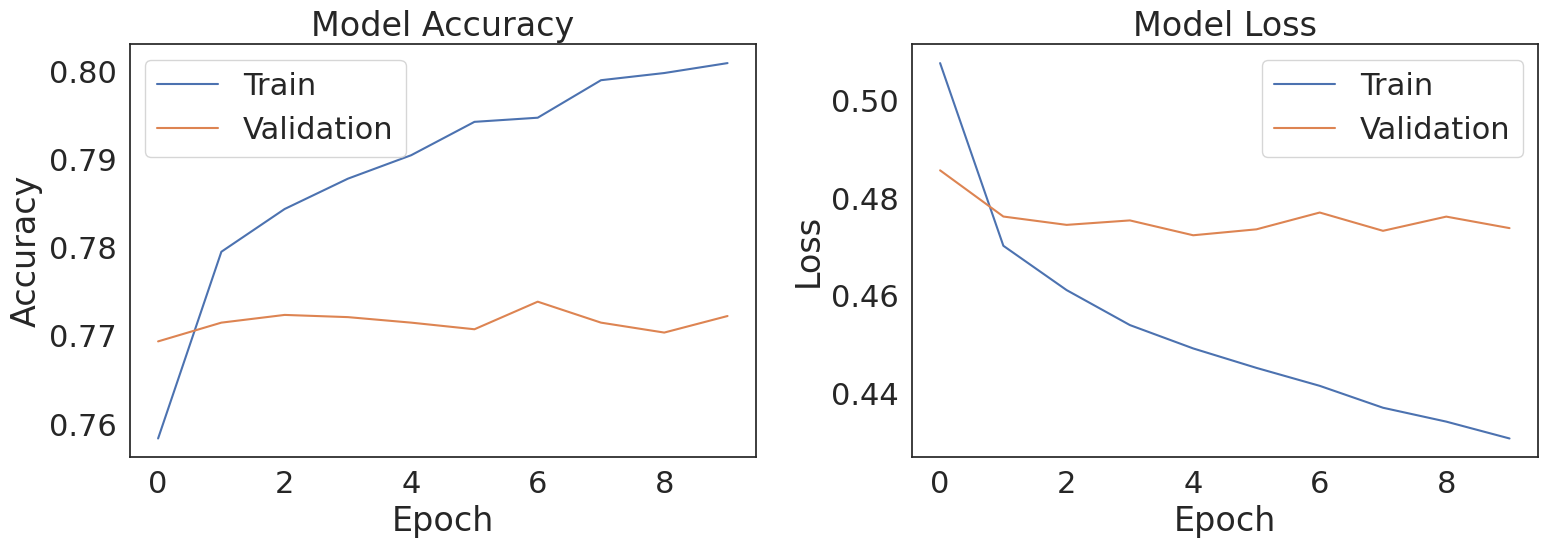

In [48]:
# Increase the size of the figure
plt.figure(figsize=(16, 6))

# Adjust the subplot layout
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Adjust the layout so that the plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

## the training loss is lower than the validation loss it might may cause over fitting

### so proposing early stopping to avoid such scenario


## Neural Network model

In [49]:
from keras.callbacks import EarlyStopping

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, mode='min')

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4272 - accuracy: 0.8026 - val_loss: 0.4783 - val_accuracy: 0.7717
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4242 - accuracy: 0.8043 - val_loss: 0.4788 - val_accuracy: 0.7689
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4221 - accuracy: 0.8056 - val_loss: 0.4788 - val_accuracy: 0.7705
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4191 - accuracy: 0.8069 - val_loss: 0.4882 - val_accuracy: 0.7692
Epoch 4: early stopping


In [50]:
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Thresholding for binary classification

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

313/313 [==============================] - 1s 3ms/step


In [51]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7759
F1 Score: 0.7676034429119567
Precision: 0.8043903499239295
Recall: 0.7340341134470448


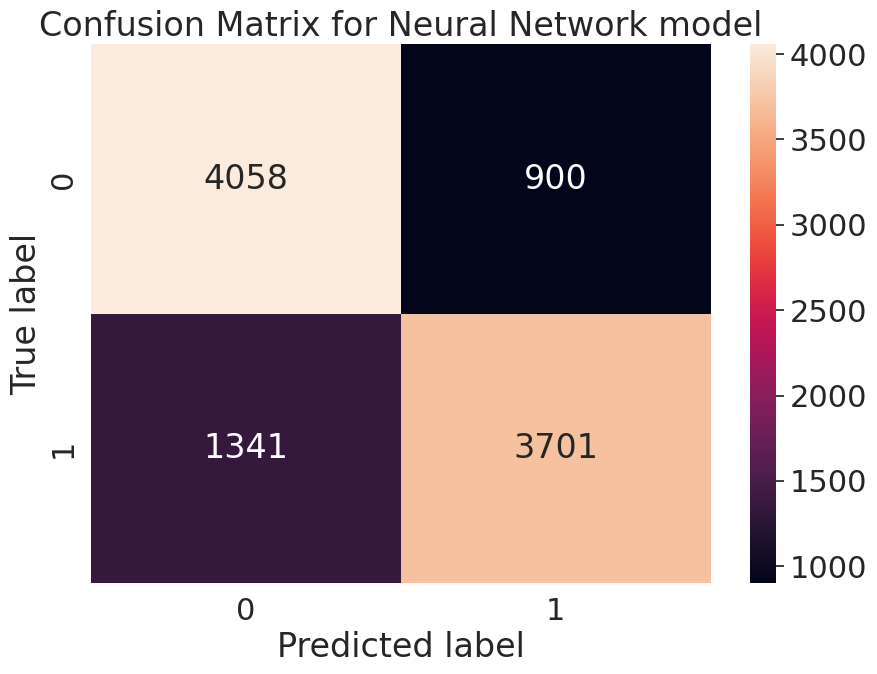

In [52]:
# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion Matrix for Neural Network model")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# Applying regularisation

In [53]:

# Create a Sequential model
model = Sequential()

# Add input layer with L2 regularization
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

# Add hidden layers with L2 regularization
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)))

# Add output layer with L2 regularization for binary classification
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))


In [54]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)


Epoch 1/10
500/500 [==============================] - 4s 4ms/step - loss: 0.9086 - accuracy: 0.7557 - val_loss: 0.6034 - val_accuracy: 0.7657
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5691 - accuracy: 0.7725 - val_loss: 0.5643 - val_accuracy: 0.7686
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.5530 - accuracy: 0.7739 - val_loss: 0.5583 - val_accuracy: 0.7641
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.5504 - accuracy: 0.7722 - val_loss: 0.5570 - val_accuracy: 0.7684
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5480 - accuracy: 0.7730 - val_loss: 0.5538 - val_accuracy: 0.7670
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.5474 - accuracy: 0.7729 - val_loss: 0.5529 - val_accuracy: 0.7700
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 0.5465 - accuracy: 0.7723 - val_loss: 0.5528 - val_accuracy: 0.7648
Epoch 

In [55]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:\n", cm)
print("Accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
 [[3942 1016]
 [1258 3784]]
Accuracy: 0.772599995136261
F1 Score: 0.7689494005283479
Precision: 0.7883333333333333
Recall: 0.7504958349861166


Text(0.5, 38.249999999999986, 'Predicted label')

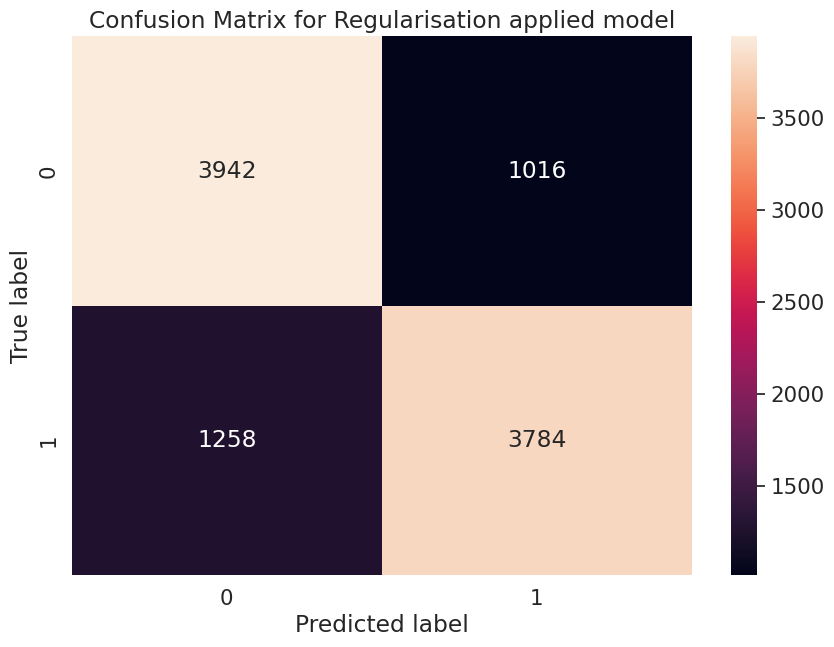

In [56]:
#plot confusion matrix

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion Matrix for Regularisation applied model")
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Hyperparameter tuning by using K-fold cross validation

In [57]:
# Define a function to create your neural network model
def create_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize an empty list to store accuracy scores, f1 score, precision score, recall score
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []


# Apply K-fold cross-validation
for i, (train, test) in enumerate(kfold.split(X_train, y_train)):
    model = create_model()  # Create a new model for each fold
    X_train_fold, X_test_fold = X_train.iloc[train], X_train.iloc[test]
    y_train_fold, y_test_fold = y_train.iloc[train], y_train.iloc[test]

     # Further split the training fold data for early stopping
    X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train_fold, y_train_fold, test_size=0.2)

      # Fit the model with early stopping
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], verbose=1)

    y_pred_fold = (model.predict(X_test_fold) > 0.5).astype(int)


    # Calculate metrics for this fold
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    f1_fold = f1_score(y_test_fold, y_pred_fold)
    precision_fold = precision_score(y_test_fold, y_pred_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)

    accuracy_scores.append(accuracy_fold)
    f1_scores.append(f1_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)


Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 0.5122 - accuracy: 0.7528 - val_loss: 0.4884 - val_accuracy: 0.7705
Epoch 2/10
400/400 [==============================] - 1s 3ms/step - loss: 0.4710 - accuracy: 0.7782 - val_loss: 0.4829 - val_accuracy: 0.7723
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 0.4596 - accuracy: 0.7841 - val_loss: 0.4792 - val_accuracy: 0.7750
Epoch 4/10
400/400 [==============================] - 2s 5ms/step - loss: 0.4529 - accuracy: 0.7877 - val_loss: 0.4794 - val_accuracy: 0.7730
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.4473 - accuracy: 0.7909 - val_loss: 0.4794 - val_accuracy: 0.7706
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.4421 - accuracy: 0.7933 - val_loss: 0.4803 - val_accuracy: 0.7756
Epoch 6: early stopping
250/250 [==============================] - 1s 2ms/step
Epoch 1/10
400/400 [==============================] - 2s 4ms/step - l

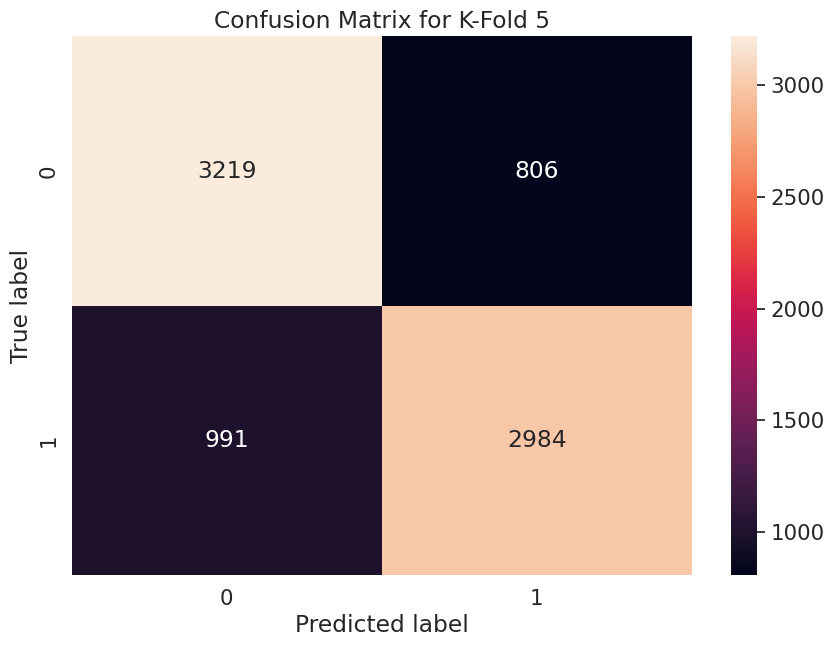

In [58]:
    # Calculating  and ploting confusion matrix
    cm = confusion_matrix(y_test_fold, y_pred_fold)
    df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(f"Confusion Matrix for K-Fold {i + 1}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [59]:
print("Cross-Validation Results (Accuracy):", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))
print("Average F1 Score:", np.mean(f1_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))

Cross-Validation Results (Accuracy): [0.77425, 0.780125, 0.777875, 0.7815, 0.775375]
Mean Accuracy: 0.7778249999999999
Standard Deviation of Accuracy: 0.0027415780127510313
Average F1 Score: 0.769360630628922
Average Precision: 0.794448773178319
Average Recall: 0.7459622641509435


# Formatting Final Results

In [60]:
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)


In [61]:
print(final_results)

        user  enrolled  predicted_reach
0     348017         1         0.750834
1     246254         1         0.818368
2     217647         0         0.164999
3      83323         1         0.193165
4     147773         0         0.488341
...      ...       ...              ...
9995  246028         0         0.285450
9996  187215         1         0.278076
9997  126617         0         0.775803
9998  102338         0         0.534855
9999   10218         1         0.914997

[10000 rows x 3 columns]


## creating model by using using ensemble method

---



In [62]:
# Train multiple models (for the ensemble)
models = [create_model() for _ in range(3)]
for model in models:
    model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Get predictions from all models
predictions = [model.predict(X_test) for model in models]

Epoch 1/10
500/500 [==============================] - 3s 4ms/step - loss: 0.5106 - accuracy: 0.7545 - val_loss: 0.4895 - val_accuracy: 0.7703
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4712 - accuracy: 0.7792 - val_loss: 0.4815 - val_accuracy: 0.7716
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4607 - accuracy: 0.7861 - val_loss: 0.4773 - val_accuracy: 0.7734
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4543 - accuracy: 0.7885 - val_loss: 0.4787 - val_accuracy: 0.7734
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4496 - accuracy: 0.7922 - val_loss: 0.4777 - val_accuracy: 0.7729
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4456 - accuracy: 0.7939 - val_loss: 0.4812 - val_accuracy: 0.7765
Epoch 6: early stopping
Epoch 1/10
500/500 [==============================] - 4s 5ms/step - loss: 0.5168 - accuracy: 0.7528 - val_loss: 0.4972 - val

In [63]:
# Average the predictions for ensemble
average_predictions = np.mean(predictions, axis=0)
average_predictions = (average_predictions > 0.5).astype(int)  # Thresholding to get binary predictions

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, average_predictions)
f1 = f1_score(y_test, average_predictions)
precision = precision_score(y_test, average_predictions)
recall = recall_score(y_test, average_predictions)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:}')
print(f'F1 Score: {f1:}')
print(f'Precision: {precision:}')
print(f'Recall: {recall:}')

Accuracy: 0.7822
F1 Score: 0.777391659852821
Precision: 0.8019822859552931
Recall: 0.754264180880603


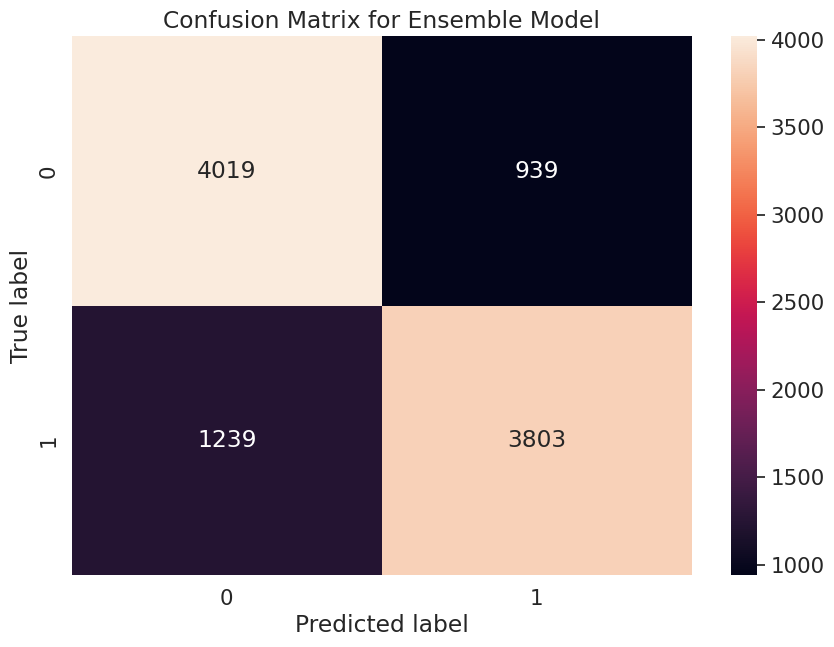

In [64]:
# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, average_predictions)
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title("Confusion Matrix for Ensemble Model")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# comparing the metrics of all case study

In [67]:
import pandas as pd

# Existing results
neural_network_results = {
    "Accuracy": 0.7713,
    "F1 Score": 0.7635,
    "Precision": 0.7808,
    "Recall": 0.7469
}

regularisation_results = {
    "Accuracy": 0.7661,
    "F1 Score": 0.7644,
    "Precision": 0.7610,
    "Recall": 0.7679
}

kfold_results = {
    "Mean Accuracy": 0.7796,
    "F1 Score Average": 0.7723,
    "PrecisionAverage": 0.7977,
    "Recall Average": 0.7486
}

ensemble_results = {
    "Accuracy": 0.7765,
    "F1 Score": 0.7636,
    "Precision": 0.8000,
    "Recall": 0.7303
}



# Creating the DataFrame with all results
results_df = pd.DataFrame({
    "Case Study": ["Neural Network", "Applying Regularisation", "K-Fold Cross Validation", "Ensemble Method"],
    "Accuracy": [neural_network_results["Accuracy"], regularisation_results["Accuracy"], kfold_results["Mean Accuracy"], ensemble_results["Accuracy"]],
    "F1 Score": [neural_network_results["F1 Score"], regularisation_results["F1 Score"], kfold_results["F1 Score Average"], ensemble_results["F1 Score"]],
    "Precision": [neural_network_results["Precision"], regularisation_results["Precision"], kfold_results["PrecisionAverage"], ensemble_results["Precision"]],
    "Recall": [neural_network_results["Recall"], regularisation_results["Recall"], kfold_results["Recall Average"], ensemble_results["Recall"]]
})


print(results_df)

                Case Study  Accuracy  F1 Score  Precision  Recall
0           Neural Network    0.7713    0.7635     0.7808  0.7469
1  Applying Regularisation    0.7661    0.7644     0.7610  0.7679
2  K-Fold Cross Validation    0.7796    0.7723     0.7977  0.7486
3          Ensemble Method    0.7765    0.7636     0.8000  0.7303


# Research Insights

## USER ENGAGEMENT ANALYSIS

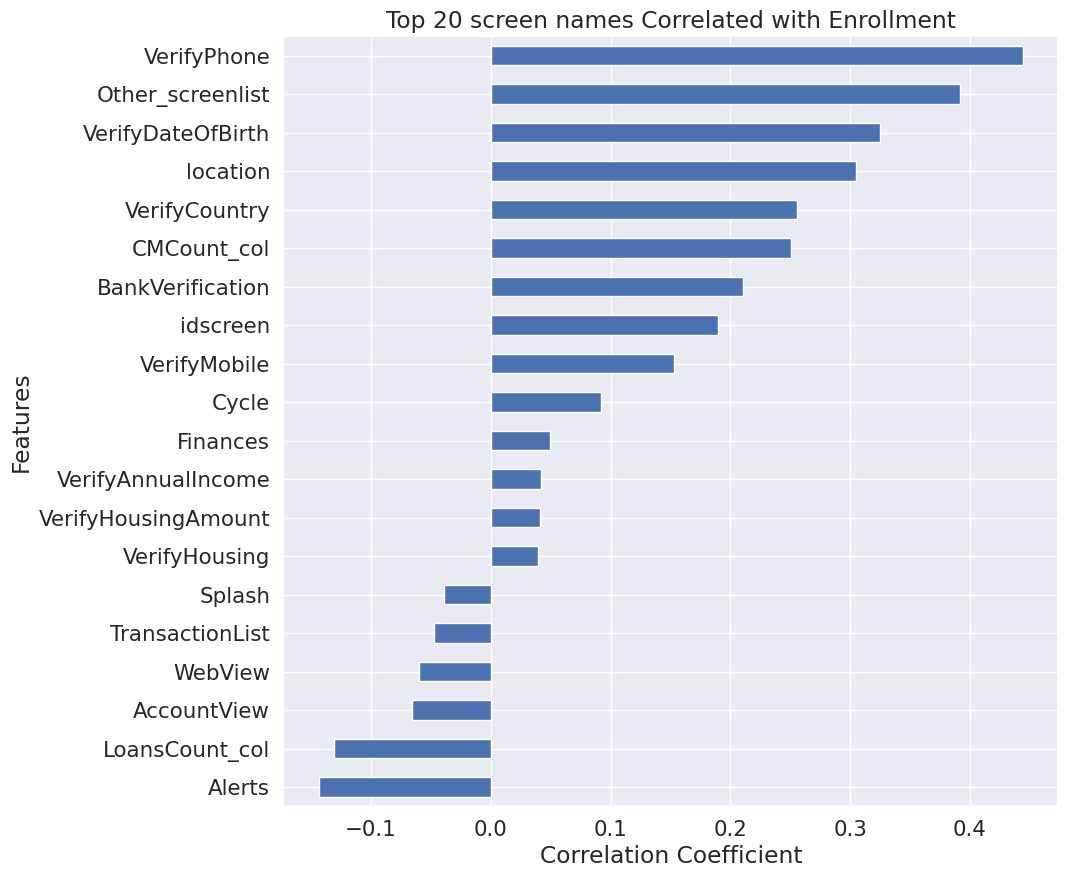

In [69]:
selected_columns = [
    'location', 'Institutions', 'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
    'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
    'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile', 'VerifyHousing',
    'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileEducation',
    'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
    'VerifyIncomeType', 'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
    'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
    'Other_screenlist', 'SavingCount_col', 'CMCount_col', 'CCCount_col', 'LoansCount_col',
    'enrolled'
]

# performing correlation analysis to provide user engagememt
filtered_data = data[selected_columns]

# Calculate the correlation with the 'enrolled' column
correlation_with_enrollment = filtered_data.corr()['enrolled'].drop('enrolled')  # Excluding self-correlation

# Selecting the top 20 features with the highest absolute correlation with enrollment
top_20_correlation = correlation_with_enrollment.abs().sort_values(ascending=False).head(20)
top_20_correlation_sorted = correlation_with_enrollment[top_20_correlation.index].sort_values()

# Plotting the top 20 correlations as a bar graph
plt.figure(figsize=(10, 10))
top_20_correlation_sorted.plot(kind='barh')
plt.title('Top 20 screen names Correlated with Enrollment')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

## Primary research aim is to finding the customer who were willing to get premium subscription but having financial constrains

In [10]:
import pandas as pd


file_path = '/content/drive/MyDrive/Colab Notebooks/thesisData/feature_engineered_data.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)


# Filter out the users who have not yet enrolled
not_enrolled_users = df[df['enrolled'] == 0]

# defining the  financial constraints
# Considering a combination of income, premium feature usage, and number of loans or credit cards
median_income = not_enrolled_users['VerifyAnnualIncome'].median()
not_enrolled_users['financial_constraint_score'] = not_enrolled_users.apply(
    lambda x: (1 if x['VerifyAnnualIncome'] < median_income else 0) +
              (1 if x['used_premium_feature'] == 0 else 0) +
              (1 if x['LoansCount_col'] > 0 else 0) +
              (1 if x['CCCount_col'] > 0 else 0),
    axis=1
)

# Adjust engagement criteria
# Considering interaction with key features as additional indicators of engagement
key_features = ['BankVerification', 'VerifyPhone', 'VerifyDateOfBirth']
not_enrolled_users['key_feature_interaction'] = not_enrolled_users[key_features].sum(axis=1)
high_interaction_threshold = not_enrolled_users['key_feature_interaction'].median()
not_enrolled_users['engagement_score'] = not_enrolled_users['key_feature_interaction'].apply(lambda x: 1 if x > high_interaction_threshold else 0)

# Revise the segmentation
not_enrolled_users['segment'] = not_enrolled_users.apply(
    lambda x: 'High Engagement, High Constraint' if x['engagement_score'] == 1 and x['financial_constraint_score'] >= 3 else
              ('High Engagement, Low Constraint' if x['engagement_score'] == 1 else
               ('Low Engagement, High Constraint' if x['financial_constraint_score'] >= 3 else
                'Low Engagement, Low Constraint')),
    axis=1
)

# The resulting segmentation distribution
segment_distribution = not_enrolled_users['segment'].value_counts()




<ipython-input-10-e644af911469>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_enrolled_users['financial_constraint_score'] = not_enrolled_users.apply(
<ipython-input-10-e644af911469>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_enrolled_users['key_feature_interaction'] = not_enrolled_users[key_features].sum(axis=1)
<ipython-input-10-e644af911469>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [11]:
print(segment_distribution)

Low Engagement, Low Constraint      17732
High Engagement, Low Constraint      5975
Low Engagement, High Constraint      1066
High Engagement, High Constraint      310
Name: segment, dtype: int64


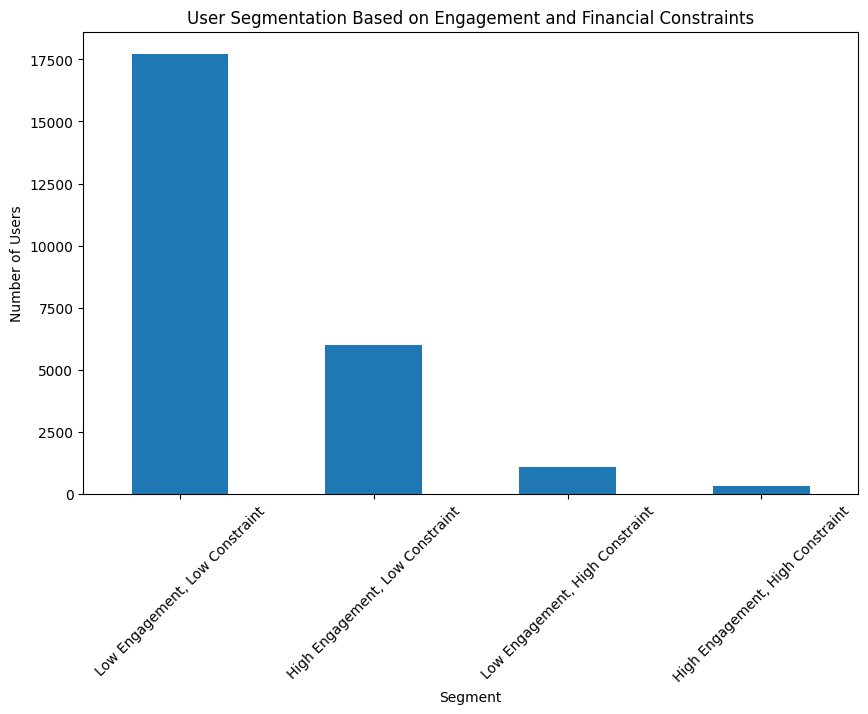

In [12]:
plt.figure(figsize=(10, 6))
segment_distribution.plot(kind='bar')
plt.title('User Segmentation Based on Engagement and Financial Constraints')
plt.xlabel('Segment')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

## Customer Age Segmentation

<Figure size 1200x600 with 0 Axes>

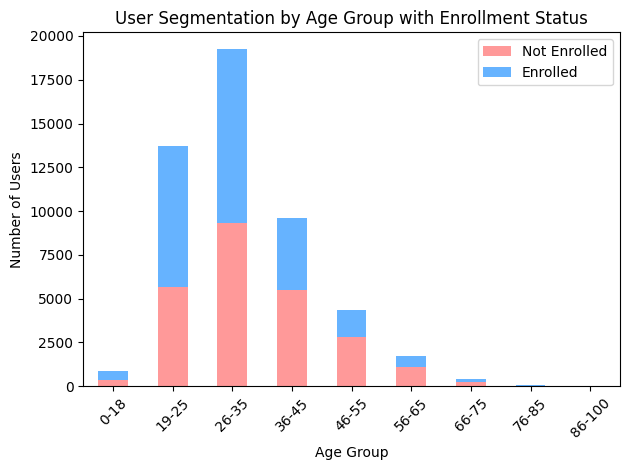

In [13]:

# Defining age groups
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age group and enrollment status
age_enrollment = df.groupby(['age_group', 'enrolled']).size().unstack()

# Plotting
plt.figure(figsize=(12, 6))
age_enrollment.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('User Segmentation by Age Group with Enrollment Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(labels=['Not Enrolled', 'Enrolled'])
plt.tight_layout()

# Show plot
plt.show()